In [ ]:

################################################################################################
### This script can be used to calculate the synthetic accessibility map for compounds.      ###
### A Green region in the compound indicates ES(Easy to synthesize) whereas the RED region   ###
### indicates that region of a molecule is HS(Hard to synthesize).                           ###
###                                                                                          ###
### DOI:10.1186/s13321-017-0206-2                                                            ###
### Code reference: https://github.com/lich-uct/syba                                         ###
### Installation: conda create -n syba_ra (Create new environment)                           ###
###               conda install -c rdkit -c lich                                             ###
###                                                                                          ###
################################################################################################

In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps

from syba import syba

import io
from PIL import Image

In [2]:
def show_png(data):
    bio = io.BytesIO(data)
    img = Image.open(bio)
    return img

In [4]:
s = syba.SybaClassifier()
s.fitDefaultScore()

In [17]:
smiles = "CC(C)(C1)CN2N1C2c(cc1)ccc1OC"
gdb = Chem.MolFromSmiles(smiles)
print(f"SYBA score {s.predict(mol=gdb)}")

SYBA score 14.278629787177783


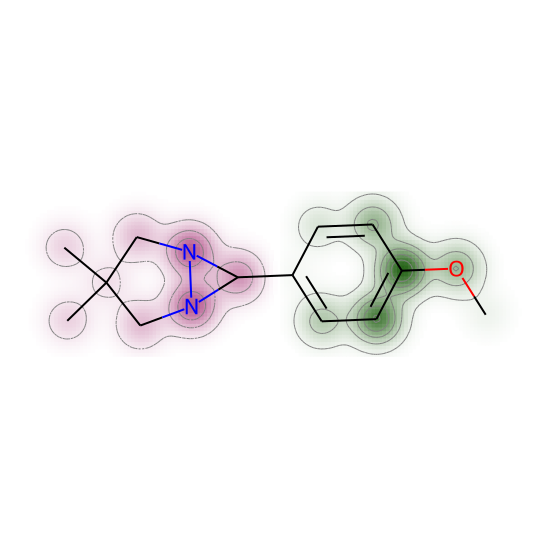

In [21]:
d = Draw.MolDraw2DCairo(550, 550)
con = s.fragment_contribution(mol=gdb)
fig = SimilarityMaps.GetSimilarityMapFromWeights(gdb,con,draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())